In [66]:
from __future__ import division, print_function
from IPython.display import display, Math, Latex

from salishsea_tools import (
    nc_tools,
    viz_tools,
)


%matplotlib inline

import numpy as np
import datetime as dtm
import netCDF4 as nc
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.io as sio


%matplotlib inline

In [2]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask = mesh.variables['tmask'][0]
bathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)
zlevels=mesh.variables['gdept_0'][0]
lat=mesh.variables['nav_lat']
lon=mesh.variables['nav_lon']

grid = nc.Dataset('/home/jacquielee/data/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy = grid.variables['Bathymetry'][:]
bathy = ma.masked_values(bathy[:],0)
bathy = ma.masked_where(bathy[:,:]>4500,bathy)

In [5]:
slj = '/mnt/storage0/jacquielee/research/tools/secFlux/ANHA4-VJT002/'
polzin ='/mnt/storage0/jacquielee/research/tools/TRANSPORTS/secFlux/ANHA4-VJT003/'
control = '/mnt/storage0/jacquielee/research/tools/TRANSPORTS/secFlux/ANHA4-EXH005/'
control_storage = '/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'

In [8]:
ugrid = ma.array(nc.Dataset(control_storage+'2012-2016avg_vozocrtx.nc').variables['vozocrtxfour'],mask=(mask-1)*-1)
vgrid = ma.array(nc.Dataset(control_storage+'2012-2016avg_vomecrty.nc').variables['vomecrtyfour'],mask=(mask-1)*-1)

In [26]:
mask.shape

(50, 800, 544)

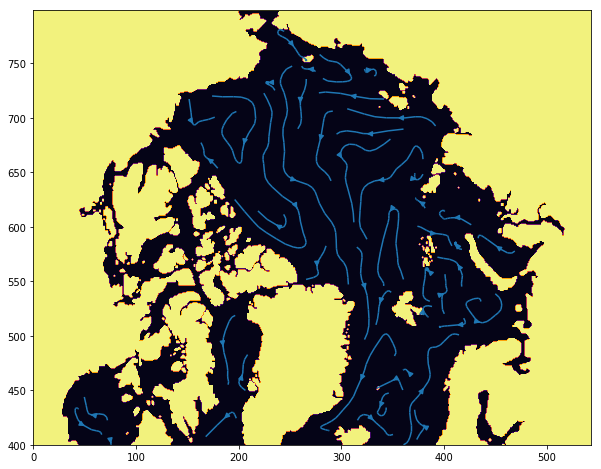

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
cmap = plt.get_cmap('inferno',25)
cmap.set_bad('burlywood')
cmap.set_over(color='black')
ax.streamplot(np.arange(0,544,10), np.arange(400,800,10), ugrid[4,400::10,::10], vgrid[4,400::10,::10],cmap=cmap)
ax.contourf(np.arange(0,544), np.arange(400,800),(mask[4,400:,:]-1)*-1,cmap=cmap)

#,colors=['black'],levels=[)
#viz_tools.plot_land_mask(ax, grid, np.arange(0,544,10), np.arange(400,800,10))

TypeError: griddata() takes at least 5 arguments (4 given)

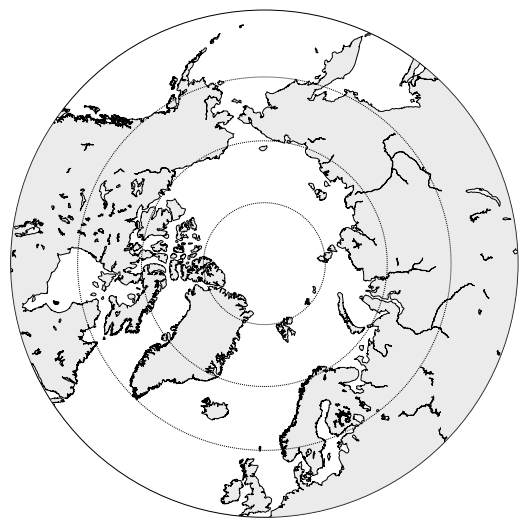

In [52]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=50,lon_0=0,resolution='l',round='True',ax=ax)
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(60.,90.,10.),labels=['60N','70N','80N'])
x_lon,y_lat=m(lon[:,:],lat[:,:])
cmap = plt.get_cmap('inferno',25)

lon_new = plt.mlab.griddata(x_lon.flatten(),y_lat.flatten(),ugrid[4,:,:].flatten(),interp='linear')
lat_new = plt.mlab.griddata(x_lon.flatten(),y_lat.flatten(),vgrid[4,:,:].flatten(),interp='linear')

speeds = np.sqrt(np.square(ugrid[4,::3,::3]) + np.square(vgrid[4,::3,::3]))
m.streamplot(x_lon[::3,::3], y_lat[::3,::3], ugrid[4,::3,::3], vgrid[4,::3,::3])#,speeds,cmap=cmap)
plt.show()
#mesh = m.pcolor(x_lon[:,:], y_lat[:,:],bathy[:,:],cmap=cmap)